# Studying Choropleths Map with different aspect in US Counties

## Introduction

Choropleths map is a thematic representation of statistic of that particular region. It is really is to understand as the region is colored with its corresponding value. It is also very useful to compare the different situation just by overlooking it. These type of map was introduced by geographer John Kirtland Wright in 1938[1]. We have to choose the data very carefully. For example, if we study population in the region of either state, country or world, the color of the region will change when two regions get merged. In contrast, population growth, the rate of birth or the unemployment rate will not affect even if the two regions merged. The idea here is to use normalized value for representation.

One can develop their own color bar to represent the effect of the data. For comparison, it is really useful to use 2D colormap to represent significant of one another.



## Historical County Unemployment Rate

In the present study, we will generate choropleths map for US unemployment rate from the year 2008 to 2016. The data set is taken from the U.S. Bureau of Labor Statistics website[2]. The refinement of data will be done with the pandas library. Also, we will be using own color bar, given by a function that returns the hexadecimal color representation in the range of minimum and maximum occurrence of data.

It will be excited to see the historic rate of unemployment, i.e. in 2008, the world experienced the global financial crisis. Which state has more stain of unemployment, and which state or county recovered significantly.

First let's import all the library we will need,

In [1]:
import numpy as np
from lxml import etree
import pandas
import os

%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import pylab
from pylab import *

import matplotlib.image as mpimg
import matplotlib.cm as cm

Now we will define a function, which will take the argument of RGB color in a normalized way from 0 to 1. And returns the hexadecimal representation of that color.

In [2]:
def randRGB(r,g,b):
    h = '#'
    for j in [r,g,b]:
        h += hex( min(255,int(256*j)))[2:].zfill(2)
    return(h)

Also let's define one more function that will return another function, that we can use later in our study to generate color map. The function maker function will take argument like minimum and maximum value of data value, and low, high color that will be our band where our data will lie.

In [3]:
def cmmaker(xlo, xhi, colorlo, colorhi):
    def cm(x):
        h = (x-xlo)/(xhi-xlo)
        ncolorlo = np.array(colorlo)
        ncolorhi = np.array(colorhi)
        color = ncolorlo*(1-h) + ncolorhi*h
        return randRGB(*color)
    return cm

It is time to start working on the map. We have USA county map as SVG file. This type of document occupy less memory and in raster format. It will allow us to color the county region, so it has great flexibility and scalability.
We will first correct our data file, and indexing it according to FIPS. FIPS is number associated with state and county of USA. Where state code is 2 digit long and county code is 3 digits long. Combination of this digit i.e. 5 digit FIPS code is unique, and we can relate the corresponding data to a particular county. Now in SVG file, we will iterate over its element and comparing FIPS code with data document which already indexed accordingly will give value to color generation function.
Later this file will be saved as SVG file, but for plotting reason, it will be converted into PNG file.

In [4]:
##----------- Please Use Ubuntu and make sure INKSCAPE is installed ---------##
##-----------------Else make change in OS command rispectively---------------##
url='https://www.bls.gov/lau/laucnty{}.xlsx'
name = 'U{}.svg'
com = 'inkscape -f U{}.svg -e U{}.png -d 400 -b WHITE'
for p in range(8,17):
    #if p==9: break
    m = str(p).zfill(2)
    URL = url.format(m)
    u1 = pandas.read_excel(URL,skiprows=6,skipfooter=3,header=None)
    u1.columns = [0,1,2,3,4,5,6,7,8,'Urate']
    u1['FIPS'] = u1[0].map(lambda x: str(x)[2:7])
    u1.index = u1['FIPS']
    u1 = u1.drop(columns=u1.columns[:9])
    u1 = u1.drop(columns=u1.columns[1])
    ##---------------Color generator function-------------------------------##
    cm1 = cmmaker(u1['Urate'].min(), u1['Urate'].max(), np.array([0.4,0.73,1]), np.array([0.43,0,0]))
    
    with open('USA.svg') as f:
            map = etree.fromstring(f.read().encode('utf-8'))
    item = map[0] # second g is State lines and separators

    for i,path in enumerate(item):
            if 'FIPS' in path.attrib['id']:
                fs = path.attrib['id'][5:]
                try:
                    UR = u1.loc[fs].values[0]
                    path.attrib['fill'] = cm1(UR)
                    path.attrib['fill-opacity'] = "0.8"
                except:
                    pass
            #if i>5: break
    
    h = '235'
    tick = 10
    w = (u1['Urate'].max()-u1['Urate'].min())/(tick+1)
    s= etree.Element('style')
    s.text = '.small { font: bold 5px sans-serif; }'
    map.append(s)
    for j in range(tick):
        tmp = u1['Urate'].min()+(j*w)
        tmp2 = u1['Urate'].min()+((j+1)*w)
        fill2 = (tmp+tmp2)/2
        tmp3 = str("{0:0.1f}".format(tmp)) + '% to ' + str("{0:0.1f}".format(int(tmp2)-0.1)) + '%'
        if j==tick:
            tmp3 = str("{0:0.1f}".format(tmp)) + '% to ' + str("{0:0.1f}".format(u1['Urate'].max())) + '%'
        r = etree.Element('rect')
        t = etree.Element('text')
        r.attrib #dict of attrib
        t.attrib
        
        r.attrib['x'] = '485'
        r.attrib['y'] = str(int(h) +5)
        r.attrib['width'] = '20'
        r.attrib['height'] = '5'
        r.attrib['fill'] = cm1(fill2)
        r.attrib['fill-opacity'] = "0.8"
        map.append(r)
        
        t.attrib['x'] = '507'
        t.attrib['y'] = str(int(h) +10)
        t.attrib['class'] = 'small'
        t.text = tmp3
        map.append(t)
        h = t.attrib['y']
    
    n = name.format(m)
    with open(n,'w') as f:
            f.write(etree.tostring(map).decode('utf-8'))
    coma = com.format(m,m)
    os.system(coma)

After running the code above, you will have several files generated in your current directory. The unemployment rate of US from 2008 to 2016. To see the results here, run the code presented below.

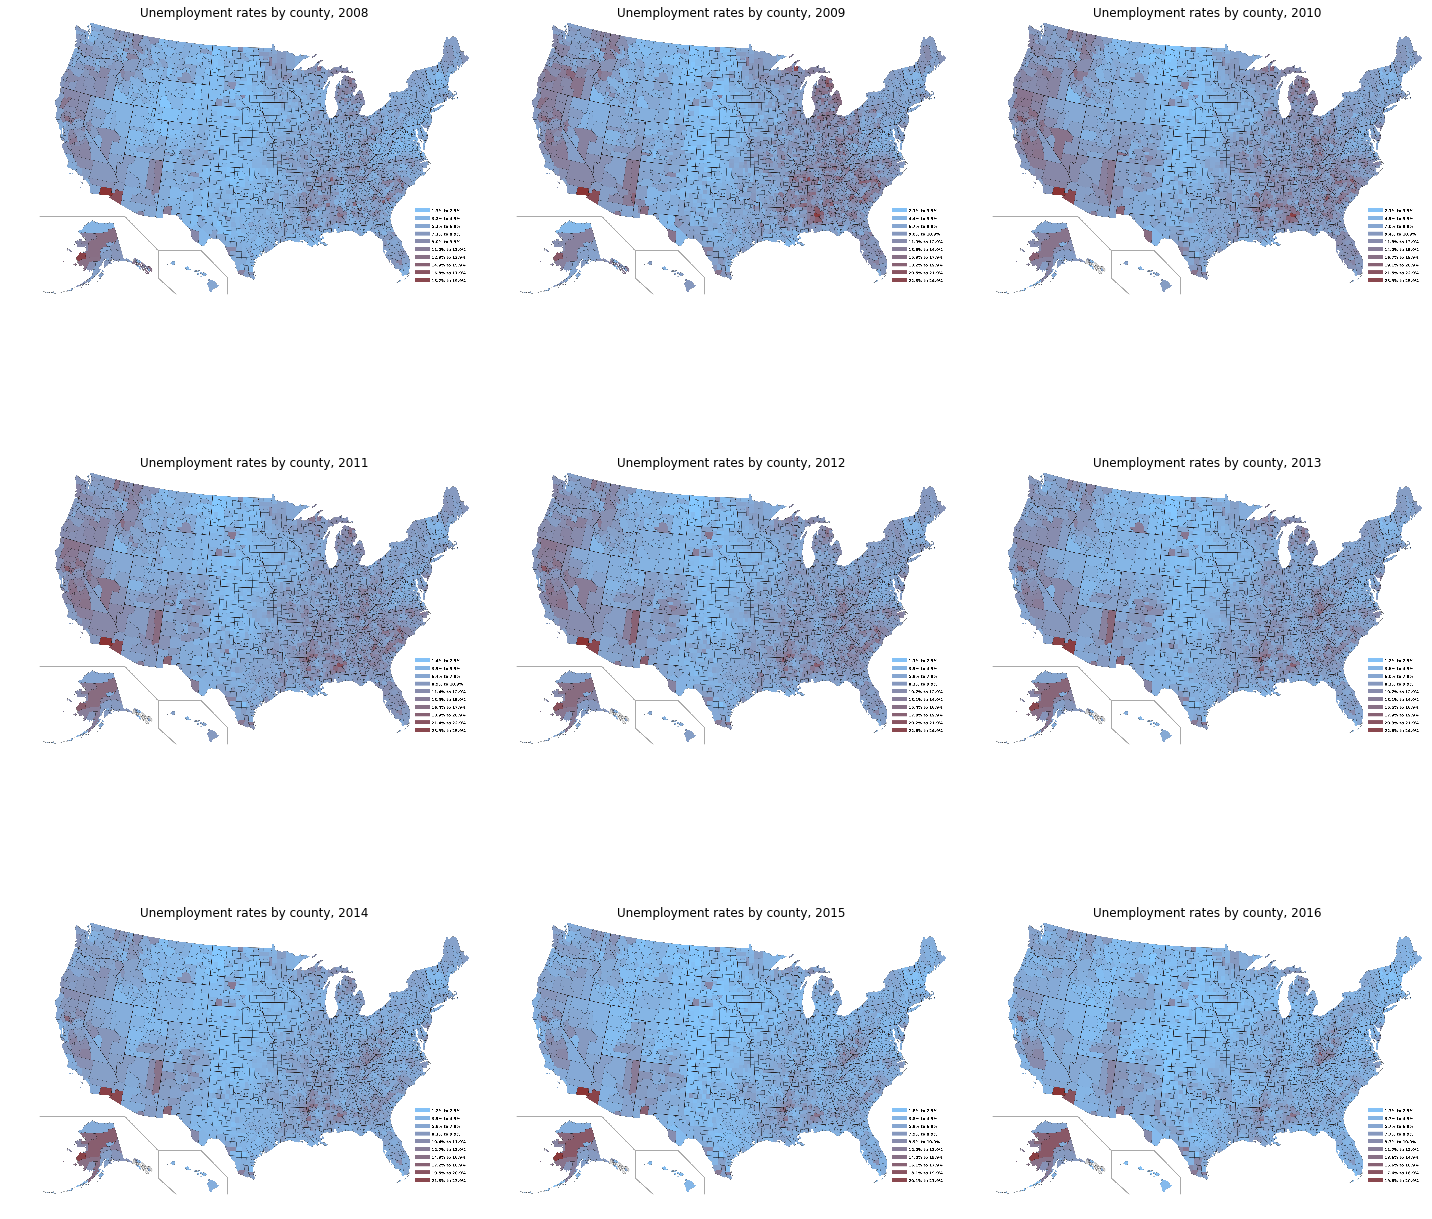

In [5]:
img1 = 'U{}.png'
Tit = 'Unemployment rates by county, 20{}'
f, axarr = plt.subplots(3, 3,figsize=(20,20))
ti = 0
for im in range(3):
    for jm in range(3):
        m = str(ti+8).zfill(2)
        tit = Tit.format(m)
        img=mpimg.imread(img1.format(m))
        axarr[im,jm].imshow(img, cmap = cm.Greys_r)
        axarr[im,jm].set_title(tit)
        axarr[im,jm].axis('off')
        ti += 1
f.tight_layout()

Here, the light blue color represents the lower unemployment rate, while light brown color represents higher unemployment rate.
In 2008, because of deregulation in the financial industry and crisis, we can see a higher unemployment rate. Although the effect of unemployment elevated after 2008, as the company couldn't afford the wages of their employee the started realizing them. The highest unemployment in any given county occurred during 2010-2011. This could be because of after effect of this crisis, from which people couldn't be recovered and lost the hope. The most affected county here is Imperial County, CA of around 24%.
East coast and west coast state are most affected and have more unemployment rate. Although east coast states recovered and have up to 10% of unemployment rate while in west coast some county is still struggling with over 20% of unemployment rate.

## Unemployment and Crime rate

Most often people get frustrated with their financial crisis and get involved in the crime like robbery, and theft. That is why relating these two factors make sense. Although to represent two data on same choropleths maps can achieve by creating the 2D color map. To understand more first let's make some kind of function that returns function to get the color in the range of two directions here.

In [6]:
def cmmaker2(xlo, xhi, ylo, yhi, xycolorlo, xycolorhi, xcolorhi, ycolorhi):
    def cm(x,y):
        h1 = (x-xlo)/(xhi-xlo)
        h2 = (y-ylo)/(yhi-ylo)
        nlo = np.array(xycolorlo)
        nhi = np.array(xycolorhi)
        nxh = np.array(xcolorhi)
        nyh = np.array(ycolorhi)
        color = np.zeros(3)
        color[0] = nlo[0]*(1-h2) + nyh[0]*h2
        color[1] = nlo[1]*(1-h1) + nxh[1]*h1
        color[2] = nhi[2]
        return randRGB(*color)
    return cm

Now let's see how this 2D color map will look like, on x axis we will choose unemployment rate and y axis will represent crime rate per 100000 population. When there is neither crime nor unemployment will be colored white, where there is highest crime rate and less unemployment will be colored cyan, where the unemployment is highest and crime rate is least will be colored magenta. And where both the rate are significant will be colored blue.

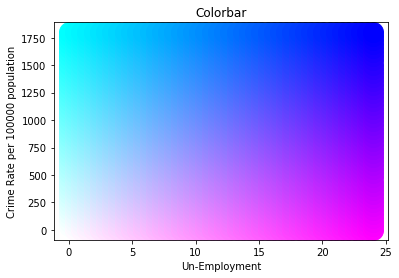

In [7]:
lo = np.array([1,1,1])
hi = np.array([0,0,1])
xhi = np.array([1,0,1])
yhi = np.array([0,1,1])

cm2d = cmmaker2(0,24,0,1800,lo,hi,xhi,yhi)

xa = np.linspace(0,24,50)
ya = np.linspace(0,1800,50)
for x in xa:
    for y in ya:
            fig = plt.plot( x , y, color=cm2d(x,y), marker="o",  markersize=20 )
plt.xlabel('Un-Employment')
plt.ylabel('Crime Rate per 100000 population')
plt.title('Colorbar')
plt.savefig('2Dcolorbar.png', bbox_inches='tight')

Now let's generate the choropleth map for this setup,

In [8]:
mycons= {'FIPS_ST':lambda x:str(x).zfill(2), 'FIPS_CTY':lambda x:str(x).zfill(3)}
u2 = pandas.read_csv('crime_data.csv',converters=mycons)
u2['FIPS'] = u2['FIPS_ST'] + u2['FIPS_CTY']
u2.index = u2['FIPS']
u2 = u2.drop(columns=u2.columns[2:])
   
lo = np.array([1,1,1])
hi = np.array([0,0,1])
xhi = np.array([1,0,1])
yhi = np.array([0,1,1])
cm2d = cmmaker2(u1['Urate'].min(),u1['Urate'].max(),u2['crime_rate_per_100000'].min(),u2['crime_rate_per_100000'].max(),lo,hi,xhi,yhi)
    
with open('USA.svg') as f:
    map = etree.fromstring(f.read().encode('utf-8'))
item = map[0] # second g is State lines and separators

for i,path in enumerate(item):
    if 'FIPS' in path.attrib['id']:
        fs = path.attrib['id'][5:]
        try:
            UR1 = u1.loc[fs].values[0]
            UR2 = u2.loc[fs].values[1]
            path.attrib['fill'] = cm2d(UR1,UR2)
            path.attrib['fill-opacity'] = "1"
        except:
            pass
            #if i>5: break
    
with open('UvsC.svg','w') as f:
    f.write(etree.tostring(map).decode('utf-8'))
os.system('inkscape -f UvsC.svg -e UvsC.png -d 400 -b WHITE')

0

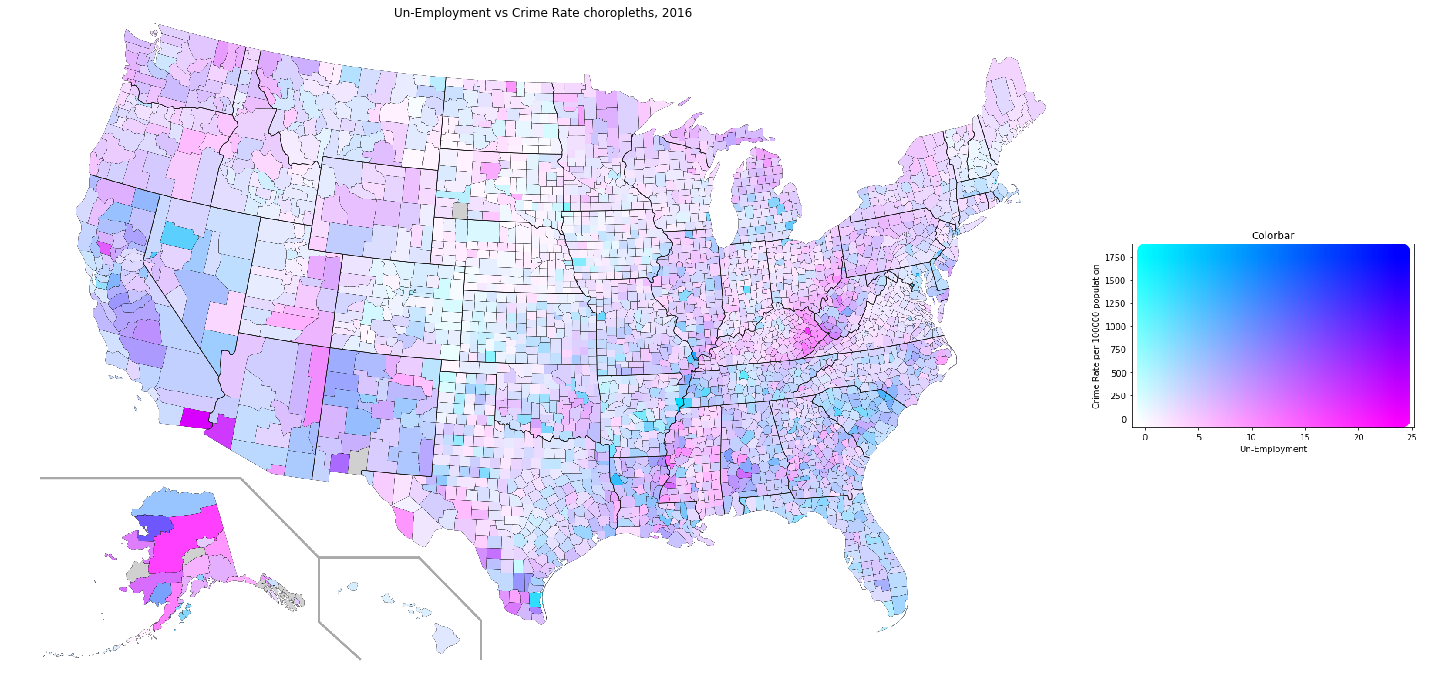

In [9]:
f, axarr = plt.subplots(1, 2, figsize=(20,20), gridspec_kw = {'width_ratios':[3, 1]})
img=mpimg.imread('UvsC.png')
axarr[0].imshow(img, cmap = cm.Greys_r)
axarr[0].set_title('Un-Employment vs Crime Rate choropleths, 2016')
axarr[0].axis('off')

img=mpimg.imread('2Dcolorbar.png')
axarr[1].imshow(img, cmap = cm.Greys_r)
axarr[1].axis('off')
f.tight_layout()

As we can see, the middle part of US are mostly white. Where it is less crime and less unemployment rate. Although Northwest Arctic, AK, which is kind of a remote area, has significant unemployment and crime rate.

## Conclusion

Overall people get recovered from the global crisis, and in 2016 US average unemployment rate was 4.9%. And in the map, we can see many recovered county. But according to history global crisis happening every 10-12 years, can we prepare for that in advance? We can study intensively with this data for the past many years and can predict the trend of financial up down. Also, we can provide needful resources to the county where unemployment is not improving.

For crime rate vs Unemployment study, it is a very thought provoking image. We can control the crime rate where there is the strong correlation between them. Also, it needs further study regarding which type of crime mostly happens when there is more unemployment.

## References

    [1] https://en.wikipedia.org/wiki/Choropleth_map
    [2] https://www.bls.gov/lau/